In [22]:
import pandas as pd

# Bank Note Authentication

Data were extracted from images that were taken from genuine and forged banknote-like specimens. 
For digitization, an industrial camera usually used for print inspection was used. 
The final images have 400x 400 pixels. 
[Wavelet Transform](https://en.wikipedia.org/wiki/Wavelet_transform) tool were used to extract features from images.

In [32]:
# load data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/BankNote_Authentication.csv'
banknote = pd.read_csv(url)
banknote.head(3)

,variance,skewness,curtosis,entropy,class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0


Using physical attributes of banknotes, our goal is to classify them into forged (`class=1`) or original (`class=0`).

**Part 1:** We'll train a k-nearest neighbors model that predicts the `class` column

Define the feature matrix X and the target vector y from the wine dataframe, and then split X and y into training and testing sets.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p>  <tt> class </tt> is a Python command, so the dot notation won't work. Use the bracket notation instead. </p>
</div>

In [26]:
X = banknote.drop('class', axis=1)
y = banknote['class']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.75)

Train a k-nearest neighbors model

In [27]:
from sklearn.neighbors import KNeighborsClassifier as knn
knn_clf = knn(n_neighbors=10)
knn_clf.fit(X_train, y_train)
y_test_pred = knn_clf.predict(X_test)

**Part 2:** We'll use accuracy and a confusion matrix to evaluate the performance of our model on the test set.

In [28]:
# import accuracy_score and confusion_matrix from sklearn.metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay

In [29]:
# accuracy
print(accuracy_score(y_test,y_test_pred))

1.0


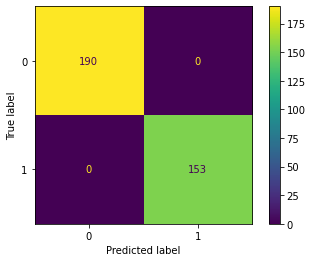

In [30]:
# confusion matrix
ConfusionMatrixDisplay.from_estimator(knn_clf, X_test, y_test)

In [33]:
# NO false positives or false negatives. Whoa!